# **4. Análisis de series temporales**

En esta guía vas a encontrar algunas herramientas básicas para el análisis de series temporales. En particular, se analizarán resultados correspondientes a *oscilaciones armónicas* y *señales periódicas*.

Se utilizarán principalmente las siguientes bibliotecas:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## 4.1. Oscilación armónica simple

El *oscilador armónico simple* es un ejemplo típico de sistemas que evolucionan en el tiempo.

En física, es común estudiar este tipo de sistemas a partir de caracterizar las oscilaciones de un resorte con una masa. Así, un sistema oscilante ideal compuesto por un resorte de constante elástica $k$ y una masa $m$, se puede modelar según la ecuación de movimiento

$$m \ddot{x}=-kx ,$$

siendo $x:=x(t)$ la posición del sistema respecto de su equilibrio $(x=0)$.

Es posible verificar que la solución

$$x(t)=A \cos(\omega_0 t +\varphi) ,$$

satisface la ecuación; siendo $A$ la amplitud de la oscilación, $\omega_0$ la frecuencia de oscilación, y $\varphi$ la fase inicial de la oscilación.

De igual forma, derivando la solución, se recuperan la velocidad y aceleración

$$v(t):=\dot{x}(t)=-A\omega_0 \sin(\omega_0 t +\varphi) ,$$

$$a(t):=\ddot{x}(t)=-A\omega_0^2 \cos(\omega_0 t +\varphi) ,$$

las cuales, de igual forma, se comportan como oscilaciones periódicas.

Los parámetros de amplitud $A$ y fase $\varphi$ se pueden resolver si se conocen las condiciones iniciales del sistema: por ejemplo, $x_0=x(0)$ y $v_0=\dot{x}(0)$.

Por otra parte, la frecuencia natural del sistema depende intrínsecamente del sistema, y calcula como

$$\omega_0=\sqrt{\frac{k}{m}} .$$

De este modo, si pudieras estimar $\omega_0$ para valores conocidos de $m$, entonces deberías poder obtener la constante $k$ del resorte. Notá además que la frecuencia en Hertz [Hz] del sistema sale de tomar

$$f_0:=\frac{\omega_0}{2\pi} .$$

Para empezar con el análisis de tus datos, considerá que vas a estudiar $a(t)$: la aceleración del sistema como función del tiempo. Para ello, adquiriste una serie de $n$ datos $(t_n,a_n)$ como se ejemplifica a continuación.

In [2]:
t = np.array([
  0.00000000,  0.15075377,  0.30150754,  0.45226131,  0.60301508,  0.75376884,
  0.90452261,  1.05527638,  1.20603015,  1.35678392,  1.50753769,  1.65829146,
  1.80904523,  1.95979899,  2.11055276,  2.26130653,  2.41206030,  2.56281407,
  2.71356784,  2.86432161,  3.01507538,  3.16582915,  3.31658291,  3.46733668,
  3.61809045,  3.76884422,  3.91959799,  4.07035176,  4.22110553,  4.37185930,
  4.52261307,  4.67336683,  4.82412060,  4.97487437,  5.12562814,  5.27638191,
  5.42713568,  5.57788945,  5.72864322,  5.87939698,  6.03015075,  6.18090452,
  6.33165829,  6.48241206,  6.63316583,  6.78391960,  6.93467337,  7.08542714,
  7.23618090,  7.38693467,  7.53768844,  7.68844221,  7.83919598,  7.98994975,
  8.14070352,  8.29145729,  8.44221106,  8.59296482,  8.74371859,  8.89447236,
  9.04522613,  9.19597990,  9.34673367,  9.49748744,  9.64824121,  9.79899497,
  9.94974874, 10.10050251, 10.25125628, 10.40201005, 10.55276382, 10.70351759,
 10.85427136, 11.00502513, 11.15577889, 11.30653266, 11.45728643, 11.60804020,
 11.75879397, 11.90954774, 12.06030151, 12.21105528, 12.36180905, 12.51256281,
 12.66331658, 12.81407035, 12.96482412, 13.11557789, 13.26633166, 13.41708543,
 13.56783920, 13.71859296, 13.86934673, 14.02010050, 14.17085427, 14.32160804,
 14.47236181, 14.62311558, 14.77386935, 14.92462312, 15.07537688, 15.22613065,
 15.37688442, 15.52763819, 15.67839196, 15.82914573, 15.97989950, 16.13065327,
 16.28140704, 16.43216080, 16.58291457, 16.73366834, 16.88442211, 17.03517588,
 17.18592965, 17.33668342, 17.48743719, 17.63819095, 17.78894472, 17.93969849,
 18.09045226, 18.24120603, 18.39195980, 18.54271357, 18.69346734, 18.84422111,
 18.99497487, 19.14572864, 19.29648241, 19.44723618, 19.59798995, 19.74874372,
 19.89949749, 20.05025126, 20.20100503, 20.35175879, 20.50251256, 20.65326633,
 20.80402010, 20.95477387, 21.10552764, 21.25628141, 21.40703518, 21.55778894,
 21.70854271, 21.85929648, 22.01005025, 22.16080402, 22.31155779, 22.46231156,
 22.61306533, 22.76381910, 22.91457286, 23.06532663, 23.21608040, 23.36683417,
 23.51758794, 23.66834171, 23.81909548, 23.96984925, 24.12060302, 24.27135678,
 24.42211055, 24.57286432, 24.72361809, 24.87437186, 25.02512563, 25.17587940,
 25.32663317, 25.47738693, 25.62814070, 25.77889447, 25.92964824, 26.08040201,
 26.23115578, 26.38190955, 26.53266332, 26.68341709, 26.83417085, 26.98492462,
 27.13567839, 27.28643216, 27.43718593, 27.58793970, 27.73869347, 27.88944724,
 28.04020101, 28.19095477, 28.34170854, 28.49246231, 28.64321608, 28.79396985,
 28.94472362, 29.09547739, 29.24623116, 29.39698492, 29.54773869, 29.69849246,
 29.84924623, 30.00000000
 ])

a = np.array([
  0.00000000,  0.40497214,  0.71415522,  1.03200431,  1.27363042,  1.81425671,
  1.85675167,  2.17108492,  2.35670522,  2.35813598,  2.33540951,  2.45491535,
  2.46154630,  2.46542309,  2.12223272,  2.02097624,  1.61087076,  1.44746243,
  1.00359642,  0.71226631,  0.34455922, -0.05784441, -0.44371182, -0.82737133,
 -1.06423051, -1.45632000, -1.83605847, -2.12103625, -2.04226184, -2.44598014,
 -2.70193610, -2.45133867, -2.50802833, -2.50684541, -2.11453370, -1.99230643,
 -2.03251200, -1.61319752, -1.33156093, -0.97857875, -0.57542546, -0.27523186,
  0.11602737,  0.48853130,  0.85350510,  1.25853218,  1.50678002,  1.71948063,
  2.17197972,  2.30625249,  2.37865906,  2.29706623,  2.27585842,  2.44944051,
  2.37635318,  2.28340655,  1.96312104,  1.89637704,  1.64291029,  1.33479670,
  0.81536578,  0.56638619,  0.18009211, -0.17660364, -0.55605288, -0.84667808,
 -1.26283885, -1.55513034, -1.88843594, -2.04224384, -2.26004812, -2.47539843,
 -2.73224153, -2.33115291, -2.57777558, -2.50783045, -2.30376492, -2.07720724,
 -1.92595437, -1.55062702, -1.18211968, -0.93475317, -0.47370520, -0.13684770,
  0.22833891,  0.58283305,  1.00469714,  1.28071424,  1.58963847,  1.88819940,
  1.87004591,  2.36302134,  2.66349373,  2.41412927,  2.55775123,  2.38312964,
  2.46247140,  2.10615960,  1.91721245,  1.77036242,  1.28852640,  1.19107698,
  0.79185714,  0.49200930,  0.07793315, -0.29303242, -0.67248080, -0.99666390,
 -1.32275108, -1.70518328, -1.94874941, -2.11781135, -2.24945473, -2.65383490,
 -2.24753235, -2.54923478, -2.43979331, -2.42555269, -2.50015308, -1.92537286,
 -1.71437317, -1.27409468, -1.16394841, -0.83899692, -0.36656987, -0.01329562,
  0.36328067,  0.71513817,  1.11244836,  1.25635250,  1.68879256,  1.91701931,
  2.20490728,  2.15190560,  2.56757730,  2.35887091,  2.27876662,  2.47261134,
  2.30996926,  2.12523256,  2.15315968,  1.53274760,  1.43164832,  1.11204772,
  0.76085860,  0.33422698, -0.05000484, -0.36263633, -0.78366509, -1.16764450,
 -1.39687883, -1.78108799, -2.12156833, -2.39246458, -2.09020856, -2.33039570,
 -2.50594874, -2.50149883, -2.29139081, -2.32906861, -2.12388431, -1.86793226,
 -1.73717422, -1.33160989, -0.99401124, -0.62005687, -0.26633938,  0.10322754,
  0.46026223,  0.80904172,  1.22745326,  1.54942620,  1.77719516,  2.00155955,
  2.14843124,  2.20258678,  2.40340870,  2.53789573,  2.55076860,  2.55658380,
  2.31546754,  2.06515810,  1.90043100,  1.46001769,  1.32882314,  1.06837782,
  0.59857451,  0.21141518, -0.17897626, -0.53160285, -0.89658340, -1.23244691,
 -1.46747704, -1.78945000, -1.95768228, -2.27211271, -2.32002611, -2.34237665,
 -2.42382686, -2.48685749
  ])

Además, si correspondiese, no olvides registrar también las incertezas de tus mediciones.

Hecho esto, podés graficar $a_n(t_n)$ para así previsualizar tus datos y verificar que obtenés el comportamiento esperado del sistema.

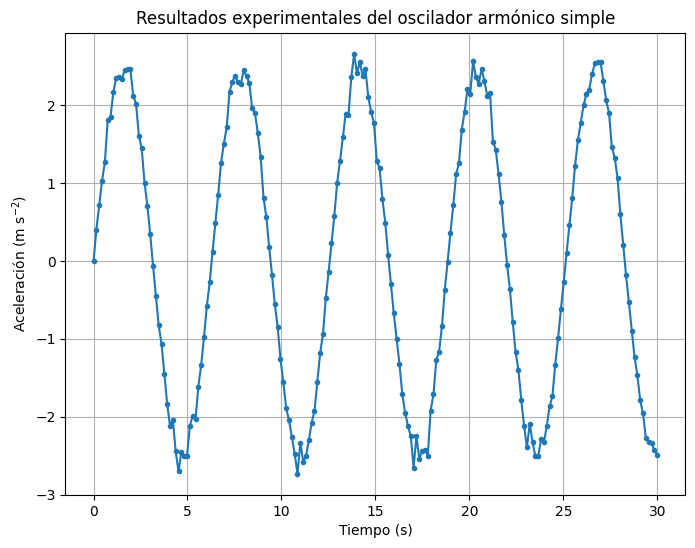

In [3]:
plt.figure(figsize=(8,6),dpi=100)
plt.plot(t, a, ".-")
plt.title('Resultados experimentales del oscilador armónico simple')
plt.xlabel('Tiempo (s)')
plt.ylabel('Aceleración (m s$^{-2}$)')
plt.grid()
plt.show()

Un primer acercamiento al análisis de tus mediciones es determinar su periodo de oscilación. Una forma de hacerlo es determinando los índices ``i0`` en los cuales tus valores de aceleración ``a[i0]`` cambian de signo,  lo que se corresponderá con estimar las raíces ``t[i0]``. Luego, el doble de las diferencias consecutivas entre raíces permitirá estimar el periodo. A continuación tenés un código, que te sugerimos revisar con atención, que te permitirá estimar el periodo a través de su media y error estándar.

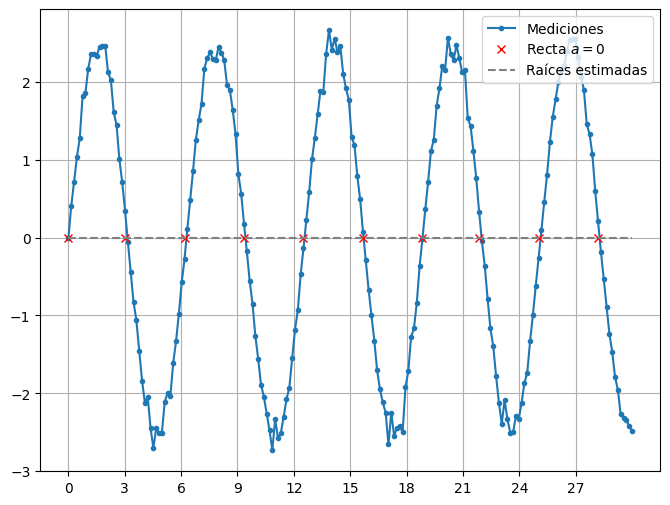

 T (media): 6.264656615555555
dT (error estándar): 0.041782885909417096


In [4]:
i0 = np.nonzero(a[0:-1]*a[1:]<=0)[0]

plt.figure(figsize=(8,6),dpi=100)
plt.plot(t,a, ".-", label="Mediciones")
plt.plot(t[i0], np.zeros_like(t[i0]), "x", color="red", label="Recta $a=0$")
plt.plot(t,np.zeros_like(t), "--", color="gray", label="Raíces estimadas")
plt.xticks(np.arange(0, 30, 3))
plt.grid()
plt.legend(loc='upper right')
plt.show()

ceros = t[i0]
diffceros = ceros[1:]-ceros[0:-1]
period_mean = 2*np.mean(diffceros)
period_sem = 2*np.std(diffceros)/np.sqrt(len(diffceros))

print(' T (media):', period_mean)
print('dT (error estándar):', period_sem)

Un análisis más general que podés hacer es, mediante una regresión no lineal, estimar los parámetros de tu modelo: amplitud $A$, frecuencia $\omega_0$ y fase $\varphi$. Inclusive, si tu masa $m$ es conocida, podés estimar el coeficiente $k$ del resorte a partir de tu estimación de $\omega_0$.

Siguiendo esta estrategia, la aceleración de un oscilador armónico simple se puede modelar como

$$a(t) = \underbrace{-A\omega_0^2}_{B} \cos(\omega_0 t +\varphi) = B \cos(\omega_0 t +\varphi) ,$$

donde la redefinición de $B$ sirve para simplificar tu ajuste, ya que se desea siempre tener el mínimo número de parámetros posibles.

En el bloque a continuación, se define la función `a(t,B,w0,phi)` según $a(t;B,\omega_0,\varphi)$ y se ejecuta el ajuste no lineal correspondiente. De esta forma, podés obtener las estimaciones de los parámetros $(B\pm \sigma_B)$, $(\omega_0\pm \sigma_{\omega_0})$ y $(\varphi\pm \sigma_{\varphi})$.

In [5]:
def at(t,B,w0,phi):
  return B*np.cos(w0*t+phi)

popt, pcov = curve_fit(at, t, a, p0 = (2.5, 1.0, -np.pi/2 + 2*np.pi))

B = popt[0]
w0 = popt[1]
phi = popt[2]

dB = np.sqrt(pcov[0,0])
dw0 = np.sqrt(pcov[1,1])
dphi = np.sqrt(pcov[2,2])

print('   B = ', B)
print('  dB = ', dB)

print('  w0 = ', w0)
print(' dw0 = ', dw0)

print(' phi = ', phi)
print('dphi = ', dphi)

   B =  2.4963805997835538
  dB =  0.009187693622493161
  w0 =  0.9997048525246478
 dw0 =  0.0004265770468049765
 phi =  4.711813204009124
dphi =  0.0073306700539007225


El ajuste de cuadrados mínimos no lineal, realizado por `curve_fit`, tiene como argumentos la función `at` propuesta como modelo y los valores experimentales de tiempo `t` y aceleración `a`. Adicionalmente, se configuraron valores estimativos (iniciales) de los parámetros $(B,\omega_0,\varphi)$ mediante el argumento `p0` de `curve_fit`. Una elección correcta de estos valores estimativos de los parámetros permite que el algoritmo de cuadrados mínimos no lineal tenga una correcta convergencia ya que, a diferencia del caso no lineal, un ajuste no lineal en los parámetros puede converger a valores no plausibles para el modelo, en particular si hay muchos parámetros en juego. En caso de que no verifiques una correcta convergencia de los parámetros, intentá mejorar los valores estimativos de los parámetros, o bien reducir la cantidad de datos al momento de realizar el ajuste.

Usando las estimaciones de tus parámetros, podés contrastar tu modelo frente a tus resultados experimentales.

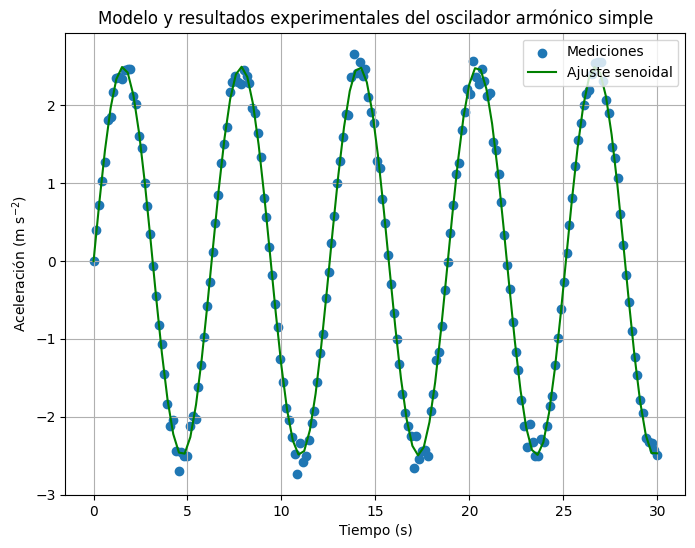

In [6]:
axis = np.linspace(0, 30, 100)
plt.figure(figsize=(8,6),dpi=100)
plt.scatter(t, a, label="Mediciones")
plt.plot(axis, at(axis, *popt), 'g-', label="Ajuste senoidal")
plt.title('Modelo y resultados experimentales del oscilador armónico simple')
plt.xlabel('Tiempo (s)')
plt.ylabel('Aceleración (m s$^{-2}$)')
plt.grid()
plt.legend(loc='upper right')
plt.show()

Por último, suponiendo que el sistema tiene una masa $m=(1.0\pm 0.1) \, \textrm{kg}$ y que la frecuencia natural estimada es $(0.9997\pm 0.0004) \, \textrm{rad Hz}$, es posible estimar la constante del resorte $k$ junto con su incerteza $\sigma_k$ como ejemplifica en el siguiente bloque.

In [7]:
m = 1.0
dm = 0.1

k = m*w0**2
dk = np.sqrt((dm*w0**2)**2+dw0*(2*m*w0)**2)

print(' k = ', k)
print('dk = ', dk)

 k =  0.9994097921613279
dk =  0.10813648985163198


## 4.2. Oscilación armónica amortiguada

Puede verificarse que, en general, un sistema oscilatorio se ve amortiguado debido a la interacción viscosa con su medio. Este tipo de oscilación armónica amortiguada se puede modelar como

$$m \ddot{x}=-kx-b\dot{x} ,$$

donde $b$ da cuenta del grado de viscosidad del medio.

Para un caso subamortiguado, tal que $b^2<4km$, puede verificarse que la posición a todo tiempo es

$$x(t)=A e^{-\lambda t} \cos(\omega t + \varphi)$$

donde $\lambda:=b/2m$ y la frecuencia

$$\omega:=\sqrt{\omega_0^2-\lambda^2}$$

depende de la frecuencia natural $\omega_0$ del sistema sin amortiguamiento; es decir, para $b\equiv 0$.

Al igual que fuera realizado antes, la aceleración se puede representar como

$$a(t):=\ddot{x}(t)=B e^{-\lambda t} \cos(\omega t + \varphi) ,$$

siendo $B$ una amplitud que corresponda a la aceleración.

Siguiendo la estrategia del inciso anterior, intentá realizar un ajuste no lineal sobre tus datos para predecir los parámetros relevantes del sistema. Tené en cuenta que ahora tu modelo va a depender de un parámetro adicional $\lambda$, el cual debés contemplar en la definición de tu función.

## 4.3. Análisis espectral (lectura opcional)

En la naturaleza podés encontrar distintos tipos de ondas, muchas de las cuales son composiciones de oscilaciones armónicas simples. Por ejemplo, las ondas sonoras que solés escuchar resultan de la superposición de ondas sinusoidales con distintas amplitudes y frecuencias.

Bajo esta consideración, uno puede construir una señal caracterizada por la superposición de ondas simples. Por ejemplo, si superponés tres ondas de amplitudes $\{12,6,3\}$ y frecuencias $\{\pi,2\pi,3\pi\}$ obtenés una señal de amplitud

$$S(t) = 12\sin(\pi t)+6\sin(2\pi t)+3\sin(3\pi t). $$

A continuación se ejemplifica la generación de esta última señal.

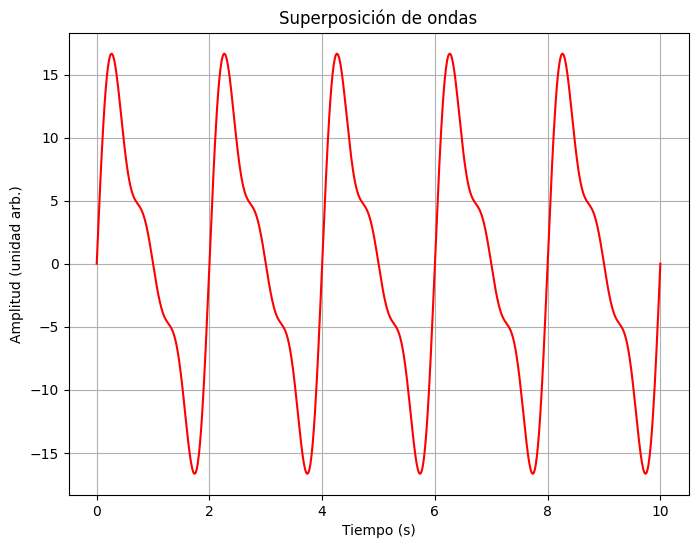

In [8]:
def single(t,A,w0,phi):
  return A*np.sin(w0*t+phi)

time = np.linspace(0, 10, 1000)
wave = single(time,12,np.pi,0) + single(time,6,2*np.pi,0) + single(time,3,3*np.pi,0)

plt.figure(figsize=(8,6),dpi=100)
plt.plot(time, wave, 'r-')
plt.title('Superposición de ondas')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (unidad arb.)')
plt.grid()
plt.show()

Ahora suponé que obtenes experimentalmente una señal compuesta por ondas con amplitudes y frecuencias, a priori, desconocidas.

Para ejemplificar, en el siguiente bloque podés simular esta experiencia, en la cual medís una señal generada que, en apariencia, es indiscernible.

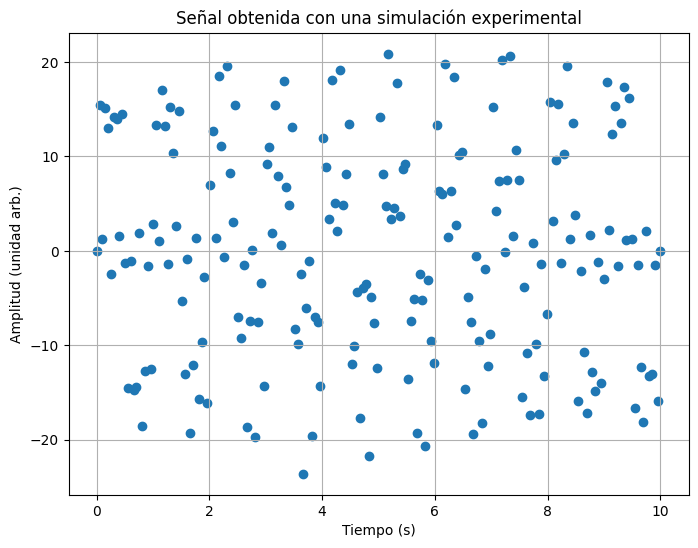

In [9]:
def single(t,A,w0,phi):
  return A*np.sin(w0*t+phi)

def random_wave(t):
  mu = single(time,12,2*np.pi,0) + single(time,4,3*2*np.pi,0) + single(time,10,7*2*np.pi,0)
  return np.random.normal(mu, np.abs(mu)*0.1)

N = 200
T = 10.0 / 200.0
time = np.linspace(0.0, N*T, N)
wave = random_wave(time)

plt.figure(figsize=(8,6),dpi=100)
plt.scatter(time, wave)
plt.title('Señal obtenida con una simulación experimental')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (unidad arb.)')
plt.grid()
plt.show()

Entonces, dada esta señal obtenida experimentalmente, una pregunta válida que te podés hacer es: *¿cómo recupero las distintas frecuencias propias de esta señal compuesta?*

La respuesta no es sencilla, pero existe un algoritmo muy fácil de usar: la *transformada rápida de Fourier* (abreviado en inglés, FFT). No es importante que comprendas por el momento el detalle de esta herramienta, sino que eventualmente recuerdes que existe y puedas ahondar en caso de necesitarla.

Este algoritmo `fft` es muy fácil de utilizar y te permite resolver la amplitud de cada una de las frecuencias propias del sistema. A continuación se ejemplifica su uso para el set de datos simulados anteriormente.

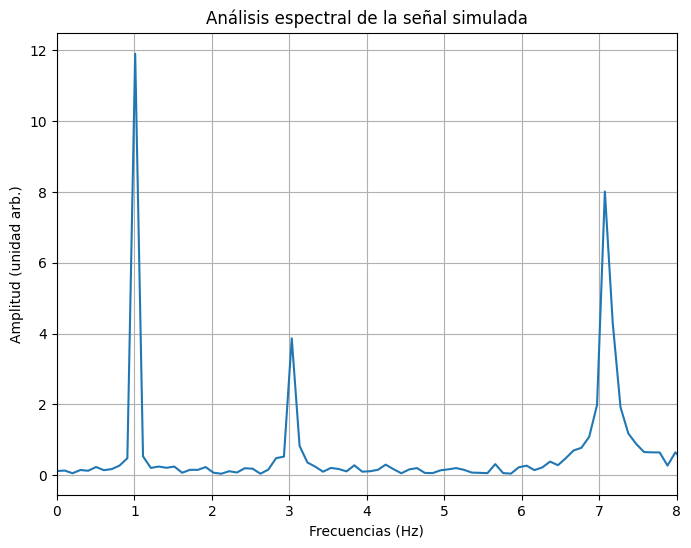

In [10]:
from scipy.fft import fft

xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
yf = fft(wave)

plt.figure(figsize=(8,6),dpi=100)
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.xlim(0,8)
plt.title('Análisis espectral de la señal simulada')
plt.xlabel('Frecuencias (Hz)')
plt.ylabel('Amplitud (unidad arb.)')
plt.grid()
plt.show()

En el gráfico efectuado podés observar el *análisis espectral de la señal*, correspondiente a una función $S(f)$; es decir, amplitud en función de la frecuencia $f=\omega_0/2\pi$.

Lo impresionantes es que, a partir de una señal en apariencia indiscernible, se podés recuperar las amplitudes y frecuencias características. En particular, podés verificar la experiencia simulada tenía una señal compuesta de amplitudes $S_0=\{12,4,8\}$ y frecuencias $\omega_0=\{1\cdot 2\pi,3\cdot 2\pi,7\cdot 2\pi\}$.

> *Documento elaborado por Adán Garros (adan@garros.net) bajo licencia [CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/deed.es). Se agradece especialmente a Verónica Pérez Schuster por la revisión del contenido. Resultan bienvenidos comentarios y sugerencias. Última actualización: 2022-10-29.*